In [1]:
import matplotlib
import sys
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
import gseapy as gp

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.decomposition import PCA
from cmapPy.pandasGEXpress.parse import parse
from scipy import stats
from pandas import DataFrame as df
from matplotlib import pyplot as plt
from matplotlib.ft2font import FT2Font
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def get_font(*args, **kwargs):
    return FT2Font(*args, **kwargs)

fm.get_font = get_font

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Path

In [17]:
poseidon_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/'
data_home = poseidon_home + 'data/'

# Data

In [3]:
# CMAP drugs
compound_info = pd.read_csv(poseidon_home + '/data/CMAP2020_Cancer/compoundinfo_beta.txt',
                            header=0, index_col=1, sep='\t')
compound_info = compound_info.groupby(level=0).first()
compound_info

,pert_id,target,moa,canonical_smiles,inchi_key,compound_aliases
cmap_name,,,,,,
1-EBIO,BRD-K70586315,NaN,NaN,CCn1c2ccccc2[nH]c1=O,CXUCKELNYMZTRT-UHFFFAOYSA-N,NaN
1-HYDROXYANTHRAQUINONE,BRD-K62620932,NaN,NaN,NaN,NaN,NaN
1-HYDROXYPHENAZINE,BRD-K66151076,NaN,NaN,NaN,NaN,NaN
1-NAPHTHYLAMINE,BRD-K05741221,NaN,NaN,NaN,NaN,NaN
1-NITRONAPHTHALENE,BRD-K72839221,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
zolpidem,BRD-K44876623,GABRA1,Benzodiazepine receptor agonist,CN(C)C(=O)Cc1c(nc2ccc(C)cn12)-c1ccc(C)cc1,ZAFYATHCZYHLPB-UHFFFAOYSA-N,NaN
zonisamide,BRD-A28095882,SCN11A,Sodium channel blocker,CN1C2CCC1CC(C2)OC(c3ccccc3)c4ccccc4N,KZFDKINRISJFCO-UHFFFAOYSA-N,NaN
zopiclone,BRD-A34309505,GABRA1,GABA receptor agonist,CN1CCN(CC1)C(=O)OC2N(C(=O)c3nccnc23)c4ccc(Cl)cn4,GBBSUAFBMRNDJC-UHFFFAOYSA-N,NaN


In [4]:
cmap_drug = list(compound_info.index.unique())

In [5]:
cmap_drug_id = list(compound_info['pert_id'].unique())

In [18]:
sig_info = pd.read_csv(data_home + 'CMAP2020_Cancer/siginfo_beta.txt',
                            header=0, index_col='sig_id', sep='\t')

/home/dyang-server/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,3,4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
sig_info

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
sig_id,,,,,,,,,,,,,,,,,,,,,
MET001_N8_XH:BRD-U44432129:100:336,b17,NaN,100.0,ug/ml,100 ug/ml,336 h,336.0,h,N8,BRD-U44432129,...,NAMEC8,H05|H06|H07|H08,MET001_N8_XH_X1_B17,MET001_N8_XH_X1_B17:H05|MET001_N8_XH_X1_B17:H0...,NaN,MET,BRD-U44432129,0,0.0,0.0
ABY001_A549_XH:BRD-K81418486:10:3,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,A549,BRD-K81418486,...,A549,L04|L08|L12,ABY001_A549_XH_X1_B15,ABY001_A549_XH_X1_B15:L04|ABY001_A549_XH_X1_B1...,NaN,ABY,vorinostat,0,1.0,0.0
ABY001_HT29_XH:BRD-K70511574:2.5:24,b15,2.5,2.5,uM,2.5 uM,24 h,24.0,h,HT29,BRD-K70511574,...,HT29,E18|E22,ABY001_HT29_XH_X1_B15,ABY001_HT29_XH_X1_B15:E18|ABY001_HT29_XH_X1_B1...,NaN,ABY,HMN-214,0,1.0,0.0
LTC002_HME1_3H:BRD-K81418486:10,b18,10.0,10.0,uM,10 uM,3 h,3.0,h,HME1,BRD-K81418486,...,HME1,F19,LTC002_HME1_3H_X1_B18,LTC002_HME1_3H_X1_B18:F19,NaN,LTC,vorinostat,0,0.0,0.0
ABY001_H1975_XH:BRD-A61304759:10:3,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,H1975,BRD-A61304759,...,H1975,P01|P05|P09,ABY001_H1975_XH_X1_B15,ABY001_H1975_XH_X1_B15:P01|ABY001_H1975_XH_X1_...,NaN,ABY,tanespimycin,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DOSVAL001_HCC515_24H:BRD-K48853221:10,b18,10.0,10.0,uM,10 uM,24 h,24.0,h,HCC515,BRD-K48853221,...,HCC515,K01,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:K01|DOSVAL001_HCC5...,NaN,DOSVAL,BRD-K48853221,1,1.0,0.0
DOSVAL001_HCC515_24H:BRD-K90382497:10,b18,10.0,10.0,uM,10 uM,24 h,24.0,h,HCC515,BRD-K90382497,...,HCC515,O03,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:O03|DOSVAL001_HCC5...,NaN,DOSVAL,GW-843682X,0,1.0,0.0
DOSVAL002_HCC515_24H:BRD-K45785972:20,b19,20.0,20.0,uM,20 uM,24 h,24.0,h,HCC515,BRD-K45785972,...,HCC515,M22,DOSVAL002_HCC515_24H_X1.L2_B19|DOSVAL002_HCC51...,DOSVAL002_HCC515_24H_X1.L2_B19:M22|DOSVAL002_H...,NaN,DOSVAL,BRD-K45785972,0,1.0,0.0


In [19]:
sig_info[sig_info['cmap_name'] == 'PF-03758309'].sort_values(by='tas')[['pert_idose', 'tas']]

,pert_idose,tas
sig_id,,
LJP009_NEU_24H:D01,10 uM,0.000000
REP.B014_HT29_24H:K18,0.01 uM,0.000000
REP.B014_HEK293_24H:K16,0.08 uM,0.000000
REP.B014_MCF10A_24H:K15,0.25 uM,0.000000
REP.B014_A549_24H:K16,0.08 uM,0.000000
...,...,...
LJP009_THP1_24H:D02,3.33 uM,0.808468
LJP009_HELA_24H:D01,10 uM,0.821455
LJP009_HME1_24H:D01,10 uM,0.836475


In [8]:
# CTRP original tables
ctrp_cl_v21 = pd.read_csv(poseidon_home + '/data/CTRP/CTRPv2.1_2016_pub_NatChemBiol_12_109/v21.meta.per_cell_line.txt',
                          header=0, index_col=0, sep='\t')
ctrp_cp_v21 = pd.read_csv(poseidon_home + '/data/CTRP/CTRPv2.1_2016_pub_NatChemBiol_12_109/v21.meta.per_compound.txt',
                          header=0, index_col=0, sep='\t')
ctrp_auc_v21 = pd.read_csv(poseidon_home + '/data/CTRP/CTRPv2.1_2016_pub_NatChemBiol_12_109/v21.data.auc_sensitivities.txt',
                          header=0, index_col=0, sep='\t')

ctrp_cl_v22 = pd.read_csv(poseidon_home + '/data/CTRP/CTRPv2.2_2015_pub_CancerDisc_5_1210/v22.meta.per_cell_line.txt',
                          header=0, index_col=0, sep='\t')
ctrp_cp_v22 = pd.read_csv(poseidon_home + '/data/CTRP/CTRPv2.2_2015_pub_CancerDisc_5_1210/v22.meta.per_compound.txt',
                          header=0, index_col=0, sep='\t')
ctrp_auc_v22 = pd.read_csv(poseidon_home + '/data/CTRP/CTRPv2.2_2015_pub_CancerDisc_5_1210/v22.data.auc_sensitivities.txt',
                          header=0, index_col=0, sep='\t')

In [55]:
ctrp_cp_v22

,cpd_name,broad_cpd_id,top_test_conc_umol,cpd_status,gene_symbol_of_protein_target,target_or_activity_of_compound,compound_cluster_id,cpd_smiles,master_cpd_id
index_cpd,,,,,,,,,
1,ML311,BRD-A40802033,66.0,probe,MCL1,inhibitor of MCL1,65;132;227;336;358;372;425;447;476;478;479,CCN1CCN(CC1)C(c1ccc(cc1)C(F)(F)F)c1ccc2cccnc2c1O,290356
2,zebularine,BRD-A01145011,590.0,probe,DNMT1,inhibitor of DNA methyltransferases,368;429;468;477,OC[C@H]1O[C@H](C(O)[C@H]1O)n1cccnc1=O,411739
3,BRD-A02303741,BRD-A02303741,55.0,probe,DOT1L,inhibitor of histone methyltransferases,332;402;453;466;469;472;476;478;479,CC(C)N(CCCNC(=O)Nc1ccc(cc1)C(C)(C)C)C[C@H]1O[C...,659371
4,importazole,BRD-A02481876,200.0,probe,KPNB1,inhibitor of importin,81;228;345;383;450;471;477,CC(Nc1nc(nc2ccccc12)N1CCCC1)c1ccccc1,46792
5,SR8278,BRD-A02904414,66.0,probe,NR1D1,antagonist of Rev-ErbAalpha,378;424;442;456;466;469;472;476;478;479,CCOC(=O)C1Cc2ccccc2CN1C(=O)c1ccc(SC)s1,668858
...,...,...,...,...,...,...,...,...,...
477,pluripotin,BRD-K98538768,33.0,probe,MAPK1;RASAL1,promoter of embryonic stem cell self-renewal; ...,169;355;431;460;465;474;475;479,CN1C(=O)N(Cc2cnc(Nc3cc(C)nn3C)nc12)c1cc(NC(=O)...,411833
478,BRD-K99006945,BRD-K99006945,66.0,probe,NaN,screening hit,55;408;453;466;469;472;476;478;479,CCN(CC)c1ccc(cc1)C1=NNC(=O)C[C@H]1C,687395
479,JW-480,BRD-K99655327,66.0,probe,NCEH1,inhibitor of serine hydrolase enzyme NCEH,364;406;456;466;469;472;476;478;479,CC(C)c1ccccc1OC(=O)NCCc1ccc2ccccc2c1,660227


In [9]:
ctrp_cl_v21.head()

,ccl_name,ccle_primary_site,ccle_primary_hist,ccle_hist_subtype_1
master_ccl_id,,,,
1,697,haematopoietic_and_lymphoid_tissue,lymphoid_neoplasm,acute_lymphoblastic_B_cell_leukaemia
3,5637,urinary_tract,carcinoma,NaN
4,2313287,stomach,carcinoma,adenocarcinoma
7,22RV1,prostate,carcinoma,NaN
8,253J,urinary_tract,carcinoma,transitional_cell_carcinoma


In [10]:
ctrp_cp_v21.head()

,cpd_name,broad_cpd_id,top_test_conc_umol,cpd_status,gene_symbol_of_protein_target,target_or_activity_of_compound,cpd_smiles
master_cpd_id,,,,,,,
1788,CIL55,BRD-K46556387,10.0,probe,NaN,screening hit,CN(C)CCNC(=O)c1cc2CSc3cc(Cl)ccc3-c2s1
3588,BRD4132,BRD-K86574132,160.0,probe,NaN,screening hit,CC(C)N1C(=O)S\C(=C\c2ccc(Sc3nc4ccccc4[nH]3)o2)...
12877,BRD6340,BRD-K35716340,33.0,probe,NaN,screening hit,C(Cn1c2ccccc2c2ccccc12)c1nc2ccccc2[nH]1
17712,ML006,BRD-K89692698,530.0,probe,S1PR3,agonist of sphingosine 1-phosphate receptor 3,C1CN(CCO1)c1nnc(-c2ccccc2)c(n1)-c1ccccc1
18311,Bax channel blocker,BRD-A18763547,33.0,probe,BAX,inhibitor of BAX-mediated mitochondrial cytoch...,OC(CN1CCNCC1)Cn1c2ccc(Br)cc2c2cc(Br)ccc12


In [11]:
ctrp_auc_v21.head()

,area_under_curve,master_cpd_id,master_ccl_id
experiment_id,,,
1,14.782,1788,130
2,15.680,1788,569
3,15.400,1788,682
4,14.388,1788,9
5,14.843,1788,61


In [12]:
# number of drugs
print(ctrp_cp_v21['cpd_name'].unique().shape)
print(ctrp_cp_v22['cpd_name'].unique().shape)

(481,)
(481,)


In [13]:
ctrp_cp_v22.shape

(481, 9)

In [14]:
len(list(set(ctrp_cp_v21['cpd_name']) & set(ctrp_cp_v22['cpd_name']))) # the two versions are actually the same drugs

481

In [15]:
ctrp_drugs = list(set(ctrp_cp_v21['cpd_name']) & set(ctrp_cp_v22['cpd_name']))

In [16]:
ctrp_drug_id = list(set(ctrp_cp_v21['broad_cpd_id']) & set(ctrp_cp_v22['broad_cpd_id']))

# Overlap

## 1. naive pairs

In [21]:
op_naive = set(cmap_drug) & set(ctrp_drugs)

In [22]:
len(op_naive)

277

In [23]:
op_naive_id = set(cmap_drug_id) & set(ctrp_drug_id)

In [24]:
len(op_naive_id)

386

# 2. capital removal

In [25]:
ctrp_drugs_lower = [i.lower() for i in ctrp_drugs]

In [26]:
op_caprm = set(cmap_drug) & set(ctrp_drugs_lower)

In [27]:
len(op_caprm)

139

In [28]:
print(len(set(op_caprm) & set(op_naive)))

135


## 3. merge the names

In [29]:
cmap_ctrp = df(columns=['CTRP_name', 'BRD_ID', 'CTRP_ID'])
for d in cmap_drug:
    if d in ctrp_drugs:
        cmap_ctrp.at[d, 'CTRP_name'] = d
        tmp_ctrp = df(ctrp_cp_v21[ctrp_cp_v21['cpd_name'] == d])
        cmap_ctrp.at[d, 'BRD_ID'] = tmp_ctrp.loc[tmp_ctrp.index[0], 'broad_cpd_id']
        cmap_ctrp.at[d, 'CTRP_ID'] = tmp_ctrp.index[0]
    elif d.upper() in ctrp_drugs:
        tmp_d = d.upper()
        cmap_ctrp.at[d, 'CTRP_name'] = tmp_d
        tmp_ctrp = df(ctrp_cp_v21[ctrp_cp_v21['cpd_name'] == tmp_d])
        cmap_ctrp.at[d, 'BRD_ID'] = tmp_ctrp.loc[tmp_ctrp.index[0], 'broad_cpd_id']
        cmap_ctrp.at[d, 'CTRP_ID'] = tmp_ctrp.index[0]
    elif d.capitalize() in ctrp_drugs:
        tmp_d = d.capitalize()
        cmap_ctrp.at[d, 'CTRP_name'] = tmp_d
        tmp_ctrp = df(ctrp_cp_v21[ctrp_cp_v21['cpd_name'] == tmp_d])
        cmap_ctrp.at[d, 'BRD_ID'] = tmp_ctrp.loc[tmp_ctrp.index[0], 'broad_cpd_id']
        cmap_ctrp.at[d, 'CTRP_ID'] = tmp_ctrp.index[0]
    elif d.lower() in ctrp_drugs:
        tmp_d = d.lower()
        cmap_ctrp.at[d, 'CTRP_name'] = tmp_d
        tmp_ctrp = df(ctrp_cp_v21[ctrp_cp_v21['cpd_name'] == tmp_d])
        cmap_ctrp.at[d, 'BRD_ID'] = tmp_ctrp.loc[tmp_ctrp.index[0], 'broad_cpd_id']
        cmap_ctrp.at[d, 'CTRP_ID'] = tmp_ctrp.index[0]

In [30]:
cmap_ctrp

,CTRP_name,BRD_ID,CTRP_ID
3-Cl-AHPC,3-Cl-AHPC,BRD-A09890259,660796
ABT-737,ABT-737,BRD-K56301217,411738
AGK-2,AGK-2,BRD-K32536677,411716
AM-580,AM-580,BRD-K06854232,58455
AT-406,AT-406,BRD-K02834582,710154
...,...,...,...
vandetanib,vandetanib,BRD-K77625799,349002
veliparib,veliparib,BRD-K87142802,606034
vincristine,vincristine,BRD-K82109576,62602
vorinostat,vorinostat,BRD-K81418486,56554


In [31]:
# add the overlap BRDs
for did in op_naive_id:
    # not found by overlapping names
    if did not in cmap_ctrp['BRD_ID'] and did in op_naive_id:
        tmp_cmap_d = compound_info[compound_info['pert_id'] == did].index
        tmp_ctrp_d = ctrp_cp_v21[ctrp_cp_v21['broad_cpd_id'] == did]
        tmp_ctrp_dname = tmp_ctrp_d.loc[tmp_ctrp_d.index[0], 'cpd_name']
        for n in tmp_cmap_d:
            cmap_ctrp.at[n, 'CTRP_name'] = tmp_ctrp_dname
            cmap_ctrp.at[n, 'BRD_ID'] = did
            cmap_ctrp.at[n, 'CTRP_ID'] = tmp_ctrp_d.index[0]

In [32]:
cmap_ctrp

,CTRP_name,BRD_ID,CTRP_ID
3-Cl-AHPC,3-Cl-AHPC,BRD-A09890259,660796
ABT-737,ABT-737,BRD-K56301217,411738
AGK-2,AGK-2,BRD-K32536677,411716
AM-580,AM-580,BRD-K06854232,58455
AT-406,AT-406,BRD-K02834582,710154
...,...,...,...
BRD-K33583600,isoliquiritigenin,BRD-K33583600,25393
ixazomib,MLN2238,BRD-K78659596,632873
RAF-265,RAF265,BRD-K93123848,660414
KU-0060648,KU 0060648,BRD-K09499853,632119


In [33]:
cmap_ctrp.to_csv(poseidon_home + 'data/CTRP/CMAP2020_to_CTRP_name.csv', sep=',')

In [34]:
cmap_ctrp

,CTRP_name,BRD_ID,CTRP_ID
3-Cl-AHPC,3-Cl-AHPC,BRD-A09890259,660796
ABT-737,ABT-737,BRD-K56301217,411738
AGK-2,AGK-2,BRD-K32536677,411716
AM-580,AM-580,BRD-K06854232,58455
AT-406,AT-406,BRD-K02834582,710154
...,...,...,...
BRD-K33583600,isoliquiritigenin,BRD-K33583600,25393
ixazomib,MLN2238,BRD-K78659596,632873
RAF-265,RAF265,BRD-K93123848,660414
KU-0060648,KU 0060648,BRD-K09499853,632119


In [112]:
# add the ctrp id to shift ability
shift_ability = pd.read_csv(poseidon_home + 'data/shift_ability/merged_shift_compound.csv',
                            header=0, index_col=0, sep=',')
shift_ability_CTRP = shift_ability.copy()

shift_ability_CTRP['CTRP_ID'] = -666
for sig in shift_ability_CTRP.index:
    tmp_d = shift_ability_CTRP.loc[sig, 'cmap_name']
    if tmp_d in cmap_ctrp.index:
        shift_ability_CTRP.at[sig, 'CTRP_ID'] = cmap_ctrp.loc[tmp_d, 'CTRP_ID']

shift_ability_CTRP = shift_ability_CTRP[shift_ability_CTRP['CTRP_ID'] > 0]
shift_ability_CTRP.shape

(2076, 10)

In [113]:
shift_ability_CTRP.to_csv(poseidon_home + 'data/CTRP/CMAP2020_CTRP_shift_ability.csv', sep=',')

# Cell lines

In [35]:
# number of cell_lines
ctrp_cl21 = list(ctrp_cl_v21['ccl_name'].unique())
ctrp_cl22 = list(ctrp_cl_v22['ccl_name'].unique())

In [36]:
print(len(ctrp_cl21), len(ctrp_cl22))

835 645


In [37]:
len(set(ctrp_cl21) & set(ctrp_cl22))

642

In [38]:
ctrp_cl21

['697',
 '5637',
 '2313287',
 '22RV1',
 '253J',
 '253JBV',
 '42MGBA',
 '639V',
 '647V',
 '769P',
 '786O',
 '8305C',
 '8505C',
 '8MGBA',
 'A101D',
 'A172',
 'A204',
 'A2058',
 'A253',
 'A2780',
 'A375',
 'A3KAW',
 'A498',
 'A4FUK',
 'A549',
 'A673',
 'ACCMESO1',
 'ACHN',
 'AGS',
 'ALLSIL',
 'AM38',
 'AML193',
 'AMO1',
 'AN3CA',
 'ASPC1',
 'AU565',
 'BC3C',
 'BCP1',
 'BCPAP',
 'BDCM',
 'BECKER',
 'BEN',
 'BFTC905',
 'BFTC909',
 'BHT101',
 'BHY',
 'BICR16',
 'BICR18',
 'BICR22',
 'BICR31',
 'BICR56',
 'BICR6',
 'BL41',
 'BL70',
 'BT20',
 'BT474',
 'BT549',
 'BV173',
 'BXPC3',
 'C2BBE1',
 'C32',
 'CA46',
 'CADOES1',
 'CAKI1',
 'CAKI2',
 'CAL120',
 'CAL12T',
 'CAL148',
 'CAL27',
 'CAL29',
 'CAL33',
 'CAL51',
 'CAL54',
 'CAL62',
 'CAL78',
 'CAL851',
 'CALU1',
 'CALU3',
 'CALU6',
 'CAMA1',
 'CAOV3',
 'CAPAN1',
 'CAPAN2',
 'CAS1',
 'CCFSTTG1',
 'CCK81',
 'CFPAC1',
 'CGTHW1',
 'CHAGOK1',
 'CHP126',
 'CHP212',
 'CI1',
 'CJM',
 'CL11',
 'CL34',
 'CMK',
 'CMLT1',
 'COLO201',
 'COLO205',
 'COLO320'

In [39]:
ctrp_cl22

['CHP212',
 'IMR32',
 'KELLY',
 'KPNSI9S',
 'KPNYN',
 'MHHNB11',
 'NB1',
 'NH6',
 'SIMA',
 'SKNAS',
 'SKNBE2',
 'SKNDZ',
 'SKNFI',
 'SKNSH',
 'HUCCT1',
 'HUH28',
 'SNU1079',
 'SNU1196',
 'SNU308',
 'SNU478',
 'SNU869',
 'A673',
 'CADOES1',
 'CAL78',
 'G292CLONEA141B1',
 'HOS',
 'SUIT2',
 'HS822T',
 'HS888T',
 'MG63',
 'MHHES1',
 'SAOS2',
 'SJSA1',
 'SKES1',
 'SKNMC',
 'SNU182',
 'U2OS',
 'AU565',
 'BT20',
 'BT474',
 'BT549',
 'CAL120',
 'CAL148',
 'CAL51',
 'CAL851',
 'CAMA1',
 'EFM192A',
 'HCC1143',
 'HCC1395',
 'HCC1419',
 'NCIH1869',
 'HCC1500',
 'HCC1569',
 'HCC1806',
 'HCC1937',
 'HCC1954',
 'HCC202',
 'HCC38',
 'HDQP1',
 'HMC18',
 'HS578T',
 'JIMT1',
 'KPL1',
 'MCF7',
 'MDAMB157',
 'LOXIMVI',
 'MDAMB231',
 'MDAMB361',
 'MDAMB415',
 'MDAMB453',
 'MDAMB468',
 'SKBR3',
 'T47D',
 'ZR751',
 'ZR7530',
 '42MGBA',
 '8MGBA',
 'A172',
 'SW1710',
 'BECKER',
 'CAS1',
 'CCFSTTG1',
 'D283MED',
 'DAOY',
 'DBTRG05MG',
 'DKMG',
 'GAMG',
 'GB1',
 'GI1',
 'GMS10',
 'GOS3',
 'HS683',
 'RH18',
 'KG1C

In [42]:
# cmap2020 cell lines
cmap_cl = list(sig_info['cell_mfc_name'].unique())

In [47]:
len(cmap_cl)

318

In [48]:
op_ctrp21_cmap = list(set(ctrp_cl21) & set(cmap_cl))
len(set(ctrp_cl21) & set(cmap_cl))

118

In [49]:
op_ctrp22_cmap = list(set(ctrp_cl22) & set(cmap_cl))
len(set(ctrp_cl22) & set(cmap_cl))

97

In [51]:
sub_ctrp_cl21 = ctrp_cl_v21[ctrp_cl_v21['ccl_name'].isin(op_ctrp21_cmap)]
print(sub_ctrp_cl21.shape)

(118, 4)


In [52]:
sub_ctrp_cl22 = ctrp_cl_v22[ctrp_cl_v22['ccl_name'].isin(op_ctrp22_cmap)]
print(sub_ctrp_cl22.shape)

(103, 8)


In [53]:
sub_ctrp_cl21.to_csv(poseidon_home + 'data/CTRP/CMAP2020_CTRP_v21_cell_line.csv', sep=',')

In [54]:
sub_ctrp_cl22.to_csv(poseidon_home + 'data/CTRP/CMAP2020_CTRP_v22_cell_line.csv', sep=',')

In [97]:
ctrp_cl_v21[ctrp_cl_v21['ccle_primary_site'] == 'skin']

,ccl_name,ccle_primary_site,ccle_primary_hist,ccle_hist_subtype_1
master_ccl_id,,,,
23,A101D,skin,malignant_melanoma,NaN
27,A2058,skin,malignant_melanoma,NaN
30,A375,skin,malignant_melanoma,NaN
103,C32,skin,malignant_melanoma,NaN
146,CJM,skin,malignant_melanoma,NaN
166,COLO741,skin,malignant_melanoma,NaN
169,COLO792,skin,malignant_melanoma,NaN
170,COLO800,skin,malignant_melanoma,NaN
172,COLO829,skin,malignant_melanoma,NaN


In [98]:
ctrp_cl_v22[ctrp_cl_v22['ccle_primary_site'] == 'skin']

,ccl_name,snp_fp_status,culture_media,ccle_primary_site,ccle_primary_hist,ccle_hist_subtype_1,cell_line_cluster_id,master_ccl_id
index_ccl,,,,,,,,
66,LOXIMVI,SNP-matched-reference,RPMI001,skin,malignant_melanoma,NaN,74;215;285;395;464;514;539;569;601;604;615;624...,623
323,A375,SNP-matched-reference,RPMI001,skin,malignant_melanoma,NaN,277;341;462;504;511;600;609;624;631;638;647;65...,30
472,HS934T,SNP-matched-reference,DMEM001,skin,malignant_melanoma,NaN,548;618;644;655;657;660,436
505,A101D,SNP-matched-reference,DMEM001,skin,malignant_melanoma,NaN,394;490;558;595;609;624;631;638;647;651;657;660,23
506,A2058,SNP-matched-reference,DMEM001,skin,malignant_melanoma,NaN,73;286;497;557;596;619;629;643;645;654;659;660,27
507,A375,SNP-matched-reference,DMEM001,skin,malignant_melanoma,NaN,293;309;415;465;520;586;605;611;629;643;645;65...,30
508,C32,SNP-matched-reference,EMEM001,skin,malignant_melanoma,NaN,461;579;622;635;645;654;659;660,103
509,CJM,SNP-matched-reference,HAMSF10001,skin,malignant_melanoma,NaN,129;196;326;501;530;545;584;595;609;624;631;63...,146
511,COLO741,SNP-not-tested,RPMI001,skin,malignant_melanoma,NaN,635;645;654;659;660,166


In [99]:
# A375: 30, 323
# SK-MEL-5: 1047, 547

In [103]:
# subsetting
ctrp_a375_v21 = ctrp_auc_v21[ctrp_auc_v21['master_ccl_id'] == 30]
ctrp_skm5_v21 = ctrp_auc_v21[ctrp_auc_v21['master_ccl_id'] == 1047]
ctrp_a375_v22 = ctrp_auc_v22[ctrp_auc_v22['index_ccl'] == 323]
ctrp_skm5_v22 = ctrp_auc_v22[ctrp_auc_v22['index_ccl'] == 547]

print(ctrp_a375_v21.shape, ctrp_skm5_v21.shape, ctrp_a375_v22.shape, ctrp_skm5_v22.shape)

(805, 3) (406, 3) (403, 2) (406, 2)


# A375

In [116]:
shift_CTRP_a375 = shift_ability_CTRP[shift_ability_CTRP['cell_line'] == 'A375']
shift_CTRP_a375.shape

(1981, 10)

In [117]:
shift_CTRP_a375

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID
PBIOA018_A375_24H:A23,-0.510429,0.368917,trametinib,-0.879347,0.125,24.0,A375,low,royalblue,687418
PBIOA018_A375_24H:A24,-0.503196,0.495135,trametinib,-0.998331,0.040,24.0,A375,low,royalblue,687418
BRAF001_A375_24H:BRD-K09951645-001-02-7:10,-0.491640,0.421348,dabrafenib,-0.912988,10.000,24.0,A375,medium,moccasin,687954
MOAR004_A375_24H:A17,-0.489876,0.297044,PF-03758309,-0.786920,3.330,24.0,A375,low,royalblue,687953
REP.A005_A375_24H:I19,-0.489461,0.452204,dabrafenib,-0.941665,10.000,24.0,A375,medium,moccasin,687954
...,...,...,...,...,...,...,...,...,...,...
LJP007_A375_24H:L04,0.298017,-0.312779,SB-525334,0.610796,0.370,24.0,A375,low,royalblue,639962
REP.A009_A375_24H:F19,0.300381,-0.251986,KX-2391,0.552367,10.000,24.0,A375,medium,moccasin,660779
REP.A002_A375_24H:G08,0.307575,-0.255910,sotrastaurin,0.563485,3.330,24.0,A375,low,royalblue,661032
MOAR005_A375_24H:L03,0.322656,-0.380208,GMX-1778,0.702864,1.110,24.0,A375,low,royalblue,411843


## 1. V21

In [105]:
cmap_ctrp_a375 = ctrp_a375_v21[ctrp_a375_v21['master_cpd_id'].isin(cmap_ctrp['CTRP_ID'])]

In [106]:
cmap_ctrp_a375

,area_under_curve,master_cpd_id,master_ccl_id
experiment_id,,,
44,14.803,1788,30
421,14.949,1788,30
44,16.716,3588,30
421,13.810,3588,30
44,14.572,12877,30
...,...,...,...
421,15.000,679844,30
421,13.390,682993,30
44,16.185,705300,30


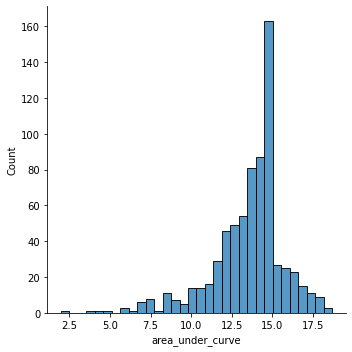

In [107]:
sns.displot(cmap_ctrp_a375['area_under_curve'])

In [108]:
ctrp_auc_v21['area_under_curve'].describe()

count    326148.000000
mean         12.866972
std           2.574463
min           0.069100
25%          11.779000
50%          13.549000
75%          14.609000
max          29.350000
Name: area_under_curve, dtype: float64

In [109]:
cmap_ctrp_a375['area_under_curve'].describe()

count    712.000000
mean      13.571909
std        2.248160
min        1.978700
25%       12.532250
50%       14.012000
75%       14.881250
max       18.677000
Name: area_under_curve, dtype: float64

In [132]:
# add to shift ability matrix
for d in shift_CTRP_a375.index:
    tmp_d = int(shift_CTRP_a375.loc[d, 'CTRP_ID'])
    if tmp_d in list(cmap_ctrp_a375['master_cpd_id']):
        tmp_ctrp = cmap_ctrp_a375[cmap_ctrp_a375['master_cpd_id'] == tmp_d]
        shift_CTRP_a375.at[d, 'CTRP_auc_v21'] = tmp_ctrp.loc[tmp_ctrp.index[0], 'area_under_curve']

/home/dyang-server/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/dyang-server/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [133]:
shift_CTRP_a375

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID,CTRP_auc_v21
PBIOA018_A375_24H:A23,-0.510429,0.368917,trametinib,-0.879347,0.125,24.0,A375,low,royalblue,687418,NaN
PBIOA018_A375_24H:A24,-0.503196,0.495135,trametinib,-0.998331,0.040,24.0,A375,low,royalblue,687418,NaN
BRAF001_A375_24H:BRD-K09951645-001-02-7:10,-0.491640,0.421348,dabrafenib,-0.912988,10.000,24.0,A375,medium,moccasin,687954,NaN
MOAR004_A375_24H:A17,-0.489876,0.297044,PF-03758309,-0.786920,3.330,24.0,A375,low,royalblue,687953,NaN
REP.A005_A375_24H:I19,-0.489461,0.452204,dabrafenib,-0.941665,10.000,24.0,A375,medium,moccasin,687954,NaN
...,...,...,...,...,...,...,...,...,...,...,...
LJP007_A375_24H:L04,0.298017,-0.312779,SB-525334,0.610796,0.370,24.0,A375,low,royalblue,639962,14.9660
REP.A009_A375_24H:F19,0.300381,-0.251986,KX-2391,0.552367,10.000,24.0,A375,medium,moccasin,660779,8.6803
REP.A002_A375_24H:G08,0.307575,-0.255910,sotrastaurin,0.563485,3.330,24.0,A375,low,royalblue,661032,14.6220
MOAR005_A375_24H:L03,0.322656,-0.380208,GMX-1778,0.702864,1.110,24.0,A375,low,royalblue,411843,12.9060


<AxesSubplot:xlabel='CTRP_auc_v21', ylabel='shift_ability'>

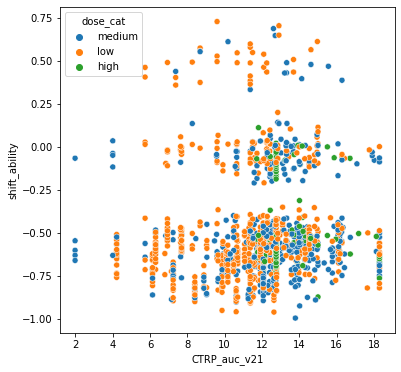

In [138]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='CTRP_auc_v21', y='shift_ability', hue='dose_cat', data=shift_CTRP_a375.dropna(axis=0, how='any'))

<AxesSubplot:xlabel='CTRP_auc_v21', ylabel='REC_profile'>

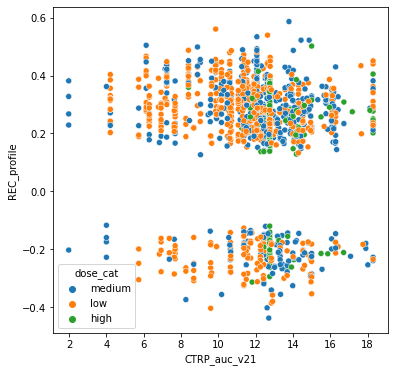

In [139]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='CTRP_auc_v21', y='REC_profile', hue='dose_cat', data=shift_CTRP_a375.dropna(axis=0, how='any'))

<AxesSubplot:xlabel='CTRP_auc_v21', ylabel='NREC_profile'>

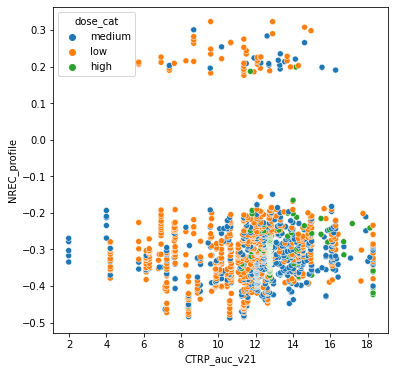

In [140]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='CTRP_auc_v21', y='NREC_profile', hue='dose_cat', data=shift_CTRP_a375.dropna(axis=0, how='any'))

<AxesSubplot:xlabel='CTRP_auc_v21', ylabel='REC_profile'>

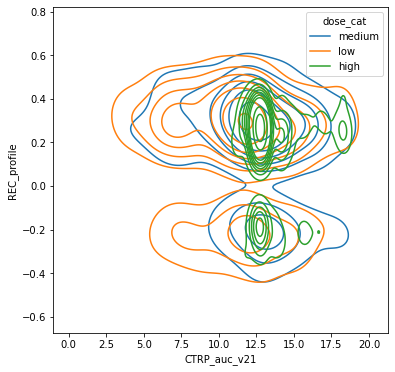

In [142]:
plt.figure(figsize=(6, 6))
sns.kdeplot(x='CTRP_auc_v21', y='REC_profile', hue='dose_cat', data=shift_CTRP_a375.dropna(axis=0, how='any'))

# specific cases

In [146]:
shift_CTRP_a375['CTRP_auc_v21'].describe()

count    1482.000000
mean       12.005219
std         2.585004
min         1.978700
25%        11.366000
50%        12.638000
75%        12.777000
max        18.293000
Name: CTRP_auc_v21, dtype: float64

In [147]:
shift_CTRP_a375['cmap_name'].value_counts()

MG-132          344
bortezomib      336
vorinostat       89
tanespimycin     33
dabrafenib       32
               ... 
SB-225002         1
KU-55933          1
MIM-1             1
gefitinib         1
merck-ketone      1
Name: cmap_name, Length: 236, dtype: int64

In [148]:
shift_CTRP_a375['dose_cat'].value_counts()

high      725
low       723
medium    533
Name: dose_cat, dtype: int64

In [150]:
shift_CTRP_a375[shift_CTRP_a375['cmap_name'] == 'MG-132'].sort_values(by='shift_ability', ascending=True)

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID,CTRP_auc_v21
REP.A017_A375_24H:K08,-0.368789,0.348871,MG-132,-0.717660,20.0,24.0,A375,high,crimson,58948,NaN
REP.B011_A375_24H:K10,-0.379983,0.333336,MG-132,-0.713319,20.0,24.0,A375,high,crimson,58948,NaN
REP.B016_A375_24H:K08,-0.388999,0.320832,MG-132,-0.709831,20.0,24.0,A375,high,crimson,58948,NaN
REP.B018_A375_24H:K09,-0.316430,0.382971,MG-132,-0.699401,20.0,24.0,A375,high,crimson,58948,NaN
REP.A026_A375_24H:O03,-0.351402,0.346225,MG-132,-0.697627,20.0,24.0,A375,high,crimson,58948,NaN
...,...,...,...,...,...,...,...,...,...,...,...
REP.A019_A375_24H:K07,-0.310905,-0.187025,MG-132,-0.123880,20.0,24.0,A375,high,crimson,58948,NaN
REP.A020_A375_24H:O03,-0.304619,-0.189522,MG-132,-0.115097,20.0,24.0,A375,high,crimson,58948,NaN
REP.A019_A375_24H:K11,-0.290573,-0.196772,MG-132,-0.093801,20.0,24.0,A375,high,crimson,58948,NaN
REP.A020_A375_24H:K09,-0.294962,-0.237676,MG-132,-0.057287,20.0,24.0,A375,high,crimson,58948,NaN


In [161]:
shift_CTRP_a375['CTRP_res_v21'] = 'not available'
shift_CTRP_a375.loc[shift_CTRP_a375[shift_CTRP_a375['CTRP_auc_v21'] <= 20.].index, 'CTRP_res_v21'] = 'resistance+'
shift_CTRP_a375.loc[shift_CTRP_a375[shift_CTRP_a375['CTRP_auc_v21'] <= 15.].index, 'CTRP_res_v21'] = 'resistance'
shift_CTRP_a375.loc[shift_CTRP_a375[shift_CTRP_a375['CTRP_auc_v21'] <= 10.].index, 'CTRP_res_v21'] = 'sensitive'
shift_CTRP_a375.loc[shift_CTRP_a375[shift_CTRP_a375['CTRP_auc_v21'] <= 5.].index, 'CTRP_res_v21'] = 'sensitive+'

<ipython-input-161-5923aba0bb3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shift_CTRP_a375['CTRP_res_v21'] = 'not available'
/home/dyang-server/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/dyang-server/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [162]:
shift_CTRP_a375

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID,CTRP_auc_v21,CTRP_res_v21
PBIOA018_A375_24H:A23,-0.510429,0.368917,trametinib,-0.879347,0.125,24.0,A375,low,royalblue,687418,NaN,not available
PBIOA018_A375_24H:A24,-0.503196,0.495135,trametinib,-0.998331,0.040,24.0,A375,low,royalblue,687418,NaN,not available
BRAF001_A375_24H:BRD-K09951645-001-02-7:10,-0.491640,0.421348,dabrafenib,-0.912988,10.000,24.0,A375,medium,moccasin,687954,NaN,not available
MOAR004_A375_24H:A17,-0.489876,0.297044,PF-03758309,-0.786920,3.330,24.0,A375,low,royalblue,687953,NaN,not available
REP.A005_A375_24H:I19,-0.489461,0.452204,dabrafenib,-0.941665,10.000,24.0,A375,medium,moccasin,687954,NaN,not available
...,...,...,...,...,...,...,...,...,...,...,...,...
LJP007_A375_24H:L04,0.298017,-0.312779,SB-525334,0.610796,0.370,24.0,A375,low,royalblue,639962,14.9660,resistance
REP.A009_A375_24H:F19,0.300381,-0.251986,KX-2391,0.552367,10.000,24.0,A375,medium,moccasin,660779,8.6803,sensitive
REP.A002_A375_24H:G08,0.307575,-0.255910,sotrastaurin,0.563485,3.330,24.0,A375,low,royalblue,661032,14.6220,resistance
MOAR005_A375_24H:L03,0.322656,-0.380208,GMX-1778,0.702864,1.110,24.0,A375,low,royalblue,411843,12.9060,resistance


In [189]:
shift_CTRP_a375['tas'] = skcm_sig_info['tas']

<ipython-input-189-ff0263aa5da3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shift_CTRP_a375['tas'] = skcm_sig_info['tas']


In [163]:
pd.crosstab(shift_CTRP_a375['dose_cat'], shift_CTRP_a375['CTRP_res_v21'])

CTRP_res_v21,not available,resistance,resistance+,sensitive,sensitive+
dose_cat,,,,,
high,337,374,13,1,0
low,110,403,36,161,13
medium,52,359,53,56,13


<AxesSubplot:xlabel='CTRP_res_v21', ylabel='tas'>

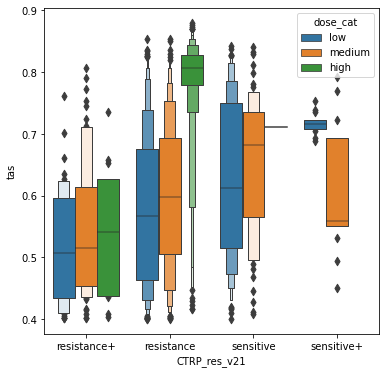

In [190]:
plt.figure(figsize=(6, 6))
sns.boxenplot(x='CTRP_res_v21', y='tas', hue='dose_cat',
            data=shift_CTRP_a375.dropna(axis=0, how='any'),
            order=['resistance+', 'resistance', 'sensitive', 'sensitive+'],
            hue_order=['low', 'medium', 'high'])

<AxesSubplot:xlabel='CTRP_res_v21', ylabel='shift_ability'>

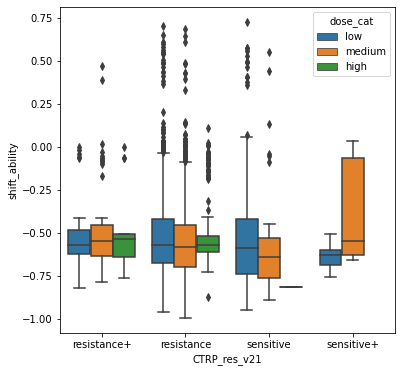

In [166]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='CTRP_res_v21', y='shift_ability', hue='dose_cat',
            data=shift_CTRP_a375.dropna(axis=0, how='any'),
            order=['resistance+', 'resistance', 'sensitive', 'sensitive+'],
            hue_order=['low', 'medium', 'high'])

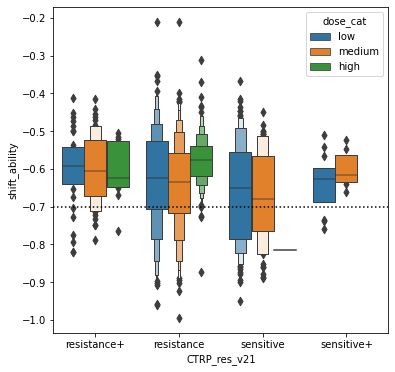

In [176]:
plt.figure(figsize=(6, 6))
sns.boxenplot(x='CTRP_res_v21', y='shift_ability', hue='dose_cat',
            data=shift_CTRP_a375[shift_CTRP_a375['shift_ability'] <= -0.2].dropna(axis=0, how='any'),
            order=['resistance+', 'resistance', 'sensitive', 'sensitive+'],
            hue_order=['low', 'medium', 'high'])
plt.axhline(y=-0.7, ls=':', c='k')

<AxesSubplot:xlabel='CTRP_res_v21', ylabel='REC_profile'>

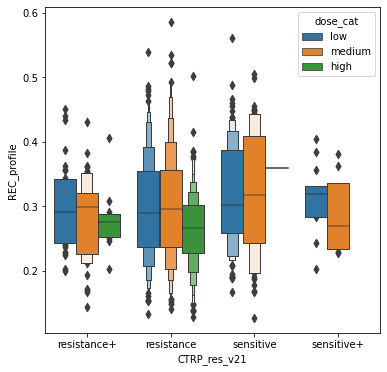

In [179]:
plt.figure(figsize=(6, 6))
sns.boxenplot(x='CTRP_res_v21', y='REC_profile', hue='dose_cat',
            data=shift_CTRP_a375[shift_CTRP_a375['REC_profile'] > 0.].dropna(axis=0, how='any'),
            order=['resistance+', 'resistance', 'sensitive', 'sensitive+'],
            hue_order=['low', 'medium', 'high'])

<AxesSubplot:xlabel='CTRP_res_v21', ylabel='NREC_profile'>

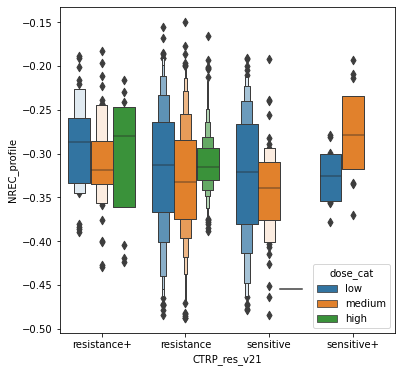

In [188]:
plt.figure(figsize=(6, 6))
sns.boxenplot(x='CTRP_res_v21', y='NREC_profile', hue='dose_cat',
            data=shift_CTRP_a375[shift_CTRP_a375['NREC_profile'] < 0.].dropna(axis=0, how='any'),
            order=['resistance+', 'resistance', 'sensitive', 'sensitive+'],
            hue_order=['low', 'medium', 'high'])

In [198]:
shift_CTRP_a375

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID,CTRP_auc_v21,CTRP_res_v21,tas
PBIOA018_A375_24H:A23,-0.510429,0.368917,trametinib,-0.879347,0.125,24.0,A375,low,royalblue,687418,NaN,not available,0.741137
PBIOA018_A375_24H:A24,-0.503196,0.495135,trametinib,-0.998331,0.040,24.0,A375,low,royalblue,687418,NaN,not available,0.723319
BRAF001_A375_24H:BRD-K09951645-001-02-7:10,-0.491640,0.421348,dabrafenib,-0.912988,10.000,24.0,A375,medium,moccasin,687954,NaN,not available,0.803374
MOAR004_A375_24H:A17,-0.489876,0.297044,PF-03758309,-0.786920,3.330,24.0,A375,low,royalblue,687953,NaN,not available,0.625996
REP.A005_A375_24H:I19,-0.489461,0.452204,dabrafenib,-0.941665,10.000,24.0,A375,medium,moccasin,687954,NaN,not available,0.759736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LJP007_A375_24H:L04,0.298017,-0.312779,SB-525334,0.610796,0.370,24.0,A375,low,royalblue,639962,14.9660,resistance,0.418661
REP.A009_A375_24H:F19,0.300381,-0.251986,KX-2391,0.552367,10.000,24.0,A375,medium,moccasin,660779,8.6803,sensitive,0.550884
REP.A002_A375_24H:G08,0.307575,-0.255910,sotrastaurin,0.563485,3.330,24.0,A375,low,royalblue,661032,14.6220,resistance,0.429111
MOAR005_A375_24H:L03,0.322656,-0.380208,GMX-1778,0.702864,1.110,24.0,A375,low,royalblue,411843,12.9060,resistance,0.427290


In [199]:
shift_CTRP_a375.to_csv(poseidon_home + 'data/CTRP/CMAP2020_CTRP_shift_ability_A375_24h.csv', sep=',')

## 1. Vorinostat

In [143]:
shift_CTRP_a375[shift_CTRP_a375['cmap_name'] == 'vorinostat']

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID,CTRP_auc_v21
DOSVAL002_A375_24H:BRD-K81418486:5,-0.419515,0.324708,vorinostat,-0.744223,4.00,24.0,A375,low,royalblue,56554,12.065
PBIOA022_A375_24H:O01,-0.409463,0.329041,vorinostat,-0.738504,10.00,24.0,A375,medium,moccasin,56554,12.065
PBIOA017_A375_24H:O01,-0.402797,0.368005,vorinostat,-0.770802,10.00,24.0,A375,medium,moccasin,56554,12.065
CPC017_A375_6H:BRD-K81418486:10,-0.401533,0.492617,vorinostat,-0.894150,10.00,6.0,A375,medium,moccasin,56554,12.065
PCL001_A375_24H:BRD-K81418486:10,-0.400857,0.406269,vorinostat,-0.807125,10.00,24.0,A375,medium,moccasin,56554,12.065
...,...,...,...,...,...,...,...,...,...,...,...
PCLB002_A375_24H:BRD-K81418486:1.11,-0.237951,0.210475,vorinostat,-0.448427,1.11,24.0,A375,low,royalblue,56554,12.065
ABY001_A375_XH:BRD-K81418486:0.625:24,-0.215974,0.184261,vorinostat,-0.400235,0.66,24.0,A375,low,royalblue,56554,12.065
MOAR019_A375_24H:A09,-0.209777,0.233235,vorinostat,-0.443012,0.66,24.0,A375,low,royalblue,56554,12.065
ABY001_A375_XH:BRD-K81418486:10:3,-0.204068,0.296104,vorinostat,-0.500172,10.00,3.0,A375,medium,moccasin,56554,12.065


## 2. A375 sensitive drugs

In [180]:
shift_CTRP_a375[shift_CTRP_a375['CTRP_auc_v21'] <= 10.].sort_values(by='shift_ability')

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID,CTRP_auc_v21,CTRP_res_v21
PBIOA015_A375_24H:I03,-0.390292,0.560732,cytarabine,-0.951023,1.11,24.0,A375,low,royalblue,62690,9.8556,sensitive
REP.A015_A375_24H:E20,-0.477975,0.421701,selumetinib,-0.899677,3.33,24.0,A375,low,royalblue,348991,8.3986,sensitive
PBIOA018_A375_24H:O12,-0.472743,0.422554,doxorubicin,-0.895297,0.04,24.0,A375,low,royalblue,36599,7.2350,sensitive
REP.A015_A375_24H:E19,-0.484035,0.406539,selumetinib,-0.890575,10.00,24.0,A375,medium,moccasin,348991,8.3986,sensitive
MOAR006_A375_24H:L04,-0.463912,0.422698,KPT-185,-0.886611,10.00,24.0,A375,medium,moccasin,660935,7.1467,sensitive
...,...,...,...,...,...,...,...,...,...,...,...,...
REP.A009_A375_24H:F19,0.300381,-0.251986,KX-2391,0.552367,10.00,24.0,A375,medium,moccasin,660779,8.6803,sensitive
REP.B009_A375_24H:F20,0.281898,-0.273347,KX-2391,0.555245,0.74,24.0,A375,low,royalblue,660779,8.6803,sensitive
REP.A009_A375_24H:F21,0.263669,-0.308753,KX-2391,0.572421,1.11,24.0,A375,low,royalblue,660779,8.6803,sensitive
REP.A009_A375_24H:F20,0.272610,-0.300483,KX-2391,0.573093,3.33,24.0,A375,low,royalblue,660779,8.6803,sensitive


In [181]:
shift_CTRP_a375[shift_CTRP_a375['CTRP_auc_v21'] <= 10.].sort_values(by='REC_profile', ascending=False)

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID,CTRP_auc_v21,CTRP_res_v21
PBIOA015_A375_24H:I03,-0.390292,0.560732,cytarabine,-0.951023,1.11,24.0,A375,low,royalblue,62690,9.8556,sensitive
CPC012_A375_6H:E10,-0.356410,0.504717,panobinostat,-0.861128,10.00,6.0,A375,medium,moccasin,54210,6.1301,sensitive
CPC011_A375_6H:BRD-K55696337-003-16-0:10,-0.323381,0.498888,topotecan,-0.822269,10.00,6.0,A375,medium,moccasin,44580,8.8817,sensitive
REP.A015_A375_24H:E24,-0.373638,0.487603,selumetinib,-0.861241,0.04,24.0,A375,low,royalblue,348991,8.3986,sensitive
PCLB002_A375_24H:BRD-K02130563:0.12,-0.339977,0.467105,panobinostat,-0.807082,0.12,24.0,A375,low,royalblue,54210,6.1301,sensitive
...,...,...,...,...,...,...,...,...,...,...,...,...
REP.A009_A375_24H:F20,0.272610,-0.300483,KX-2391,0.573093,3.33,24.0,A375,low,royalblue,660779,8.6803,sensitive
REP.B028_A375_24H:B07,-0.278488,-0.305414,GSK-461364,0.026927,2.22,24.0,A375,low,royalblue,649862,5.7314,sensitive
REP.A009_A375_24H:F21,0.263669,-0.308753,KX-2391,0.572421,1.11,24.0,A375,low,royalblue,660779,8.6803,sensitive
CPC017_A375_6H:BRD-K76674262-001-01-7:10,-0.239534,-0.374111,BRD-K76674262,0.134576,10.00,6.0,A375,medium,moccasin,375219,8.2599,sensitive


## 3. A375 resistant drugs

In [182]:
shift_CTRP_a375[shift_CTRP_a375['CTRP_auc_v21'] > 10.].sort_values(by='shift_ability')

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID,CTRP_auc_v21,CTRP_res_v21
PBIOA020_A375_24H:O07,-0.408702,0.586724,brivanib,-0.995426,10.00,24.0,A375,medium,moccasin,606246,13.786,resistance
REP.A011_A375_24H:P20,-0.420870,0.539791,etoposide,-0.960661,3.33,24.0,A375,low,royalblue,48589,12.638,resistance
PBIOA017_A375_24H:M03,-0.479056,0.479557,GDC-0879,-0.958613,1.11,24.0,A375,low,royalblue,606248,10.612,resistance
REP.A021_A375_24H:C13,-0.437620,0.487175,nilotinib,-0.924796,10.00,24.0,A375,medium,moccasin,374749,14.017,resistance
PBIOA017_A375_24H:N03,-0.484179,0.424258,PLX-4720,-0.908437,1.11,24.0,A375,low,royalblue,606256,11.371,resistance
...,...,...,...,...,...,...,...,...,...,...,...,...
LJP007_A375_24H:L04,0.298017,-0.312779,SB-525334,0.610796,0.37,24.0,A375,low,royalblue,639962,14.966,resistance
CPC006_A375_24H:BRD-K61323504-001-03-2:11.1,0.207836,-0.437854,SB-225002,0.645690,12.00,24.0,A375,medium,moccasin,52123,12.704,resistance
MOAR005_A375_24H:L02,0.289711,-0.358414,GMX-1778,0.648125,3.33,24.0,A375,low,royalblue,411843,12.906,resistance
CPC006_A375_6H:K09,0.283595,-0.402510,TPCA-1,0.686105,10.00,6.0,A375,medium,moccasin,375564,12.612,resistance


In [183]:
shift_CTRP_a375[shift_CTRP_a375['CTRP_auc_v21'] > 10.].sort_values(by='REC_profile', ascending=False)

,NREC_profile,REC_profile,cmap_name,shift_ability,dose,time,cell_line,dose_cat,dose_color,CTRP_ID,CTRP_auc_v21,CTRP_res_v21
PBIOA020_A375_24H:O07,-0.408702,0.586724,brivanib,-0.995426,10.00,24.0,A375,medium,moccasin,606246,13.786,resistance
REP.A011_A375_24H:P20,-0.420870,0.539791,etoposide,-0.960661,3.33,24.0,A375,low,royalblue,48589,12.638,resistance
CPC014_A375_6H:B04,-0.331494,0.534153,vorinostat,-0.865648,10.00,6.0,A375,medium,moccasin,56554,12.065,resistance
CPC006_A375_6H:K22,-0.352715,0.522484,7b-cis,-0.875199,10.00,6.0,A375,medium,moccasin,411805,14.433,resistance
CPC019_A375_6H:BRD-K00627859-001-01-5:10,-0.367700,0.522482,tubastatin-a,-0.890183,10.00,6.0,A375,medium,moccasin,411749,14.867,resistance
...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR005_A375_24H:L02,0.289711,-0.358414,GMX-1778,0.648125,3.33,24.0,A375,low,royalblue,411843,12.906,resistance
MOAR005_A375_24H:L03,0.322656,-0.380208,GMX-1778,0.702864,1.11,24.0,A375,low,royalblue,411843,12.906,resistance
REP.A005_A375_24H:A21,-0.186863,-0.385978,I-BET-762,0.199115,1.11,24.0,A375,low,royalblue,660245,12.842,resistance
CPC006_A375_6H:K09,0.283595,-0.402510,TPCA-1,0.686105,10.00,6.0,A375,medium,moccasin,375564,12.612,resistance
